## Description of the experiment
Here is a table where the numeric variable is continuous. The task is to compare groups in two ways: bootstrap and u-test  

Description of columns  
value – metric values  
experimentVariant – Test variant 
  
Task  
1)Compare the result between test and control for two cases:  
2)Apply bootstrap (with np.mean) and mann-whitney test and then compare p-value  
3)Apply bootstrap (with np.median) and mann-whitney test and then compare p-value  
4)Write the conclusions that can be drawn based on the analysis of the applied criteria.в  

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, mannwhitneyu, stats
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

plt.style.use('ggplot')

In [15]:
df = pd.read_csv('C:/Users/HP/Downloads/hw_bootstrap.csv', sep=';', decimal = ",")

In [16]:
df.head()

,Unnamed: 0,value,experimentVariant
0,1,10.380495,Control
1,2,9.546867,Control
2,3,11.088215,Control
3,4,10.147274,Control
4,5,9.789808,Control


In [17]:
df.value = df['value'].astype(float)

In [18]:
control_column = df.query('experimentVariant == "Control"').value
test_column = df.query('experimentVariant == "Treatment"').value

## №1 Бутстрап

In [29]:
# Let's declare a function that will allow us to test hypotheses using the bootstrap
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

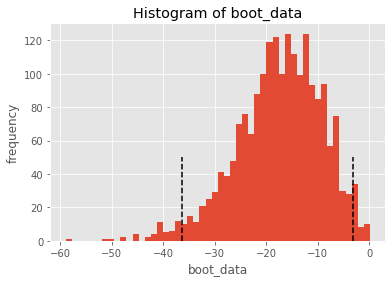

In [30]:
#Среднее
booted_data_mean = get_bootstrap(control_column, test_column, boot_it = 2000)

In [31]:
booted_data_mean["p_value"]

0.035421451066670266

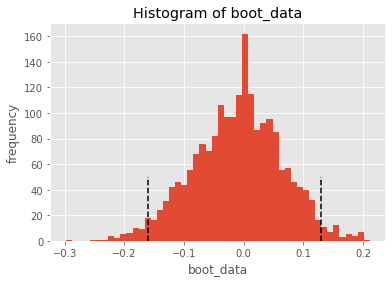

In [24]:
#Медиана
booted_data_median = get_bootstrap(control_column, test_column, boot_it = 2000)

In [25]:
booted_data_median["p_value"]

0.8951778980311526

## №2 Критерий Mann-Whitney

In [23]:
stats.mannwhitneyu(control_column, test_column)

MannwhitneyuResult(statistic=124189.5, pvalue=0.42960742912427896)

# №3 Графики

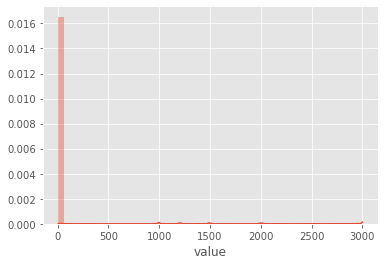

In [26]:
sns.distplot(test_column)

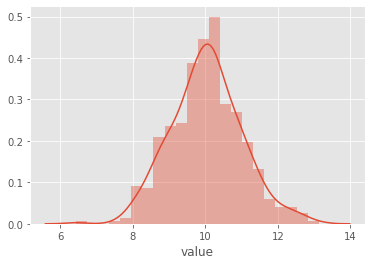

In [27]:
sns.distplot(control_column)

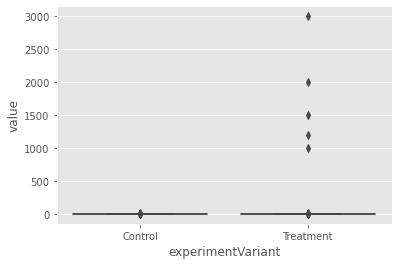

In [28]:
sns.boxplot(data = df, x = 'experimentVariant', y = 'value')

# Analysis of results

### Итого

-The test sample has large outliers, which greatly distorts the average value for us  
-Using a bootstrap with a mean estimate, we could reject the null hypothesis that the means are equal and conclude that the test and control samples have differences 
-However, the same bootstrap, but already by the median, does not allow us to reject the null hypothesis, since the p-value is much greater than 0.05, because here another hypothesis is being tested 
-The Mann-Whitney U test would also prevent us from rejecting the null hypothesis. The pvalue estimates are just as directed as the median bootstrap

## Important  
❗️ Don't compare p-values ​​of different criteria in real life  
– This increases the likelihood of making a Type I error and is misleading when analyzing the results of applying the criteria..  
– Formulate a hypothesis in advance and select a relevant statistical criterion for it as part of the design of the experiment  